In [80]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [84]:
!wget --no-check-certificate \
  https://dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com/184/messy-vs-clean-room.zip \
  -O /tmp/messy_vs_clean_room.zip

--2022-07-13 04:11:04--  https://dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com/184/messy-vs-clean-room.zip
Resolving dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com (dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com)... 205.185.216.10, 205.185.216.42
Connecting to dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com (dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com)|205.185.216.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70392746 (67M) [application/zip]
Saving to: ‘/tmp/messy_vs_clean_room.zip’

/tmp/messy_vs_clean 100%[===================>]  67.13M   336MB/s    in 0.2s    

2022-07-13 04:11:04 (336 MB/s) - ‘/tmp/messy_vs_clean_room.zip’ saved [70392746/70392746]



In [85]:
# melakukan ekstraksi pada file zip
import os
import zipfile

local_zip = '/tmp/messy_vs_clean_room.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/images'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')


In [86]:
os.listdir('/tmp/images/train')

['messy', 'clean']

In [87]:
os.listdir('/tmp/images/val')

['messy', 'clean']

In [88]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

test_datagen = ImageDataGenerator(
    rescale = 1/255
)

In [89]:
train_generator = train_datagen.flow_from_directory(
    train_dir, # direktori data latih
    target_size = (150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
    # karena ini merupakan masalah klasifikasi 2 kelas, gunakan class_mode = 'binary'
    class_mode = 'binary'
)

val_generator = test_datagen.flow_from_directory(
    val_dir, # direktori data validasi
    target_size = (150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
    batch_size = 4, # karena ini merupakan masalah klasifikasi 2 kelas gunakan class_mode = 'binary'
    class_mode = 'binary'
)

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [90]:
model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
])

In [91]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 17, 17, 128)     

In [92]:
# compile model dengan 'adam' optimizer loss function 'binary_crossentropy' 
model.compile(
    loss='binary_crossentropy',
    optimizer=tf.optimizers.Adam(),
    metrics=['accuracy']
)

In [94]:
# latih model dengan model.fit 
model.fit(
    train_generator,
      steps_per_epoch=5,
      epochs=20, 
      validation_data=val_generator, 
      validation_steps=5, 
      verbose=2
)

Epoch 1/20
5/5 - 9s - loss: 0.7039 - accuracy: 0.5063 - val_loss: 0.6843 - val_accuracy: 0.5500 - 9s/epoch - 2s/step
Epoch 2/20
5/5 - 9s - loss: 0.6880 - accuracy: 0.6625 - val_loss: 0.6747 - val_accuracy: 0.5500 - 9s/epoch - 2s/step
Epoch 3/20
5/5 - 9s - loss: 0.6726 - accuracy: 0.5750 - val_loss: 0.6419 - val_accuracy: 0.5500 - 9s/epoch - 2s/step
Epoch 4/20
5/5 - 9s - loss: 0.6036 - accuracy: 0.7312 - val_loss: 0.5123 - val_accuracy: 0.7000 - 9s/epoch - 2s/step
Epoch 5/20
5/5 - 9s - loss: 0.6631 - accuracy: 0.6125 - val_loss: 0.8955 - val_accuracy: 0.5500 - 9s/epoch - 2s/step
Epoch 6/20
5/5 - 9s - loss: 0.5998 - accuracy: 0.7250 - val_loss: 0.4970 - val_accuracy: 0.7500 - 9s/epoch - 2s/step
Epoch 7/20
5/5 - 9s - loss: 0.5572 - accuracy: 0.7563 - val_loss: 0.6873 - val_accuracy: 0.5500 - 9s/epoch - 2s/step
Epoch 8/20
5/5 - 9s - loss: 0.5784 - accuracy: 0.7375 - val_loss: 0.4456 - val_accuracy: 0.8000 - 9s/epoch - 2s/step
Epoch 9/20
5/5 - 9s - loss: 0.5495 - accuracy: 0.7312 - val_loss

Saving kamar8.jpg to kamar8.jpg
kamar8.jpg
kamar rapi


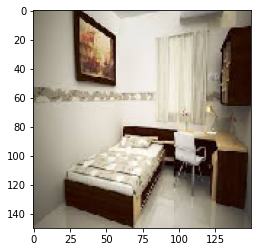

In [102]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
 
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
 
  classes = model.predict(images, batch_size=10)  
  print(fn)
  if classes==0:
   print('kamar rapi')
  else:
   print('kamar berantakan')